### Disney Delights - Explore the Magic of Disneyland
---

**Introduction**

Disneyland, often dubbed "The Happiest Place on Earth," holds a special place in the hearts of millions worldwide. With its iconic theme parks spread across different continents, each Disneyland resort promises a unique experience tailored to its cultural and geographical context. This project embarks on a journey through the enchanting worlds of Disneyland in Hong Kong, California, and Paris. Through comprehensive reviews and comparisons, the aim is to reveal what makes each resort a magical destination for families, thrill-seekers, and Disney enthusiasts alike.

The dataset is obtained from [Disneyland Reviews](https://www.kaggle.com/datasets/arushchillar/disneyland-reviews/) includes 42,000 reviews of 3 Disneyland branches - Paris, California and Hong Kong, posted by visitors on Trip Advisor.

**Project Overview**

This project aims to provide comprehensive insights into visitor experiences at various Disneyland branches through an analysis of reviews and ratings. The analysis covers several key aspects:

**1.Total Number of Reviews by Branch**: We investigate the distribution of reviews across different Disneyland branches to understand the volume of visitor feedback each location receives.

**2.Average Rating by Branch**: By calculating average ratings per branch, we identify how each Disneyland location is perceived overall by visitors.

**3.Top 10 Reviewer Regions**: We determine the top regions from which reviewers originate, offering insights into geographical patterns of visitor demographics.

**4.Yearly Average Rating for Disneyland Resorts**: This analysis tracks the yearly average ratings for overall Disneyland resorts, providing a longitudinal perspective on visitor satisfaction trends.

**5.Correlation Analysis of Reviews**: We explore the correlation between positive and negative reviews on a monthly basis and across branches, aiming to uncover any patterns or relationships between these two types of feedback.


In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:\concordia-bootcamps\DisneylandReviews.csv', encoding='latin-1')
df

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris


In [3]:
# Explore df
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


,Review_ID,Rating
count,4.265600e+04,42656.000000
mean,3.188553e+08,4.217695
std,1.657092e+08,1.063371
min,1.398724e+06,1.000000
25%,1.743274e+08,4.000000
50%,2.907583e+08,5.000000
75%,4.489579e+08,5.000000
max,6.708014e+08,5.000000


In [4]:
# Find missing values
df.isnull().sum()
df.isna().sum()

Review_ID            0
Rating               0
Year_Month           0
Reviewer_Location    0
Review_Text          0
Branch               0
dtype: int64

In [5]:
# Replace 'missing' value in Year_Month col
df['Year_Month'] = df['Year_Month'].replace('missing', pd.NaT)
# Convert the col to datetime
df['Year_Month'] = pd.to_datetime(df['Year_Month'], errors='coerce')
# Add a Year col
df['Year'] = df['Year_Month'].dt.year
# Add a Month col
df['Month'] = df['Year_Month'].dt.month
df

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Year,Month
0,670772142,4,2019-04-01,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019.0,4.0
1,670682799,4,2019-05-01,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019.0,5.0
2,670623270,4,2019-04-01,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019.0,4.0
3,670607911,4,2019-04-01,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019.0,4.0
4,670607296,4,2019-04-01,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019.0,4.0
...,...,...,...,...,...,...,...,...
42651,1765031,5,NaT,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris,NaN,NaN
42652,1659553,5,NaT,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris,NaN,NaN
42653,1645894,5,NaT,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris,NaN,NaN
42654,1618637,4,NaT,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris,NaN,NaN


### 1. Total number of reviews in each Branch

In [6]:
# Total number of reviews in each branch
df = df.copy()
total_number = df.groupby('Branch')['Review_ID'].nunique().reset_index()
# Rename the columns
total_number.columns = ['Branch', 'Review_count']
total_number

,Branch,Review_count
0,Disneyland_California,19400
1,Disneyland_HongKong,9607
2,Disneyland_Paris,13629


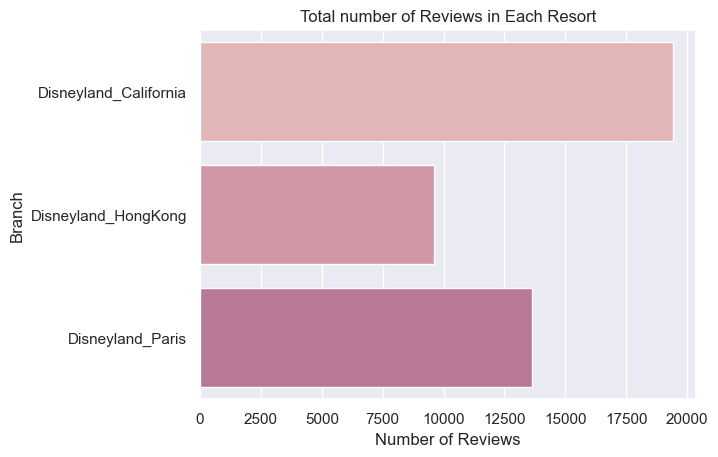

In [7]:
# Visualization
# Setting up the style
palette = sns.cubehelix_palette(dark=.25, light=.75, hue=1)
sns.set(style="ticks")
sns.set_style("darkgrid")
sns.despine()
# Plot the bar
sns.barplot(total_number, x='Review_count', y='Branch', palette=palette)
plt.title('Total number of Reviews in Each Resort')
plt.xlabel('Number of Reviews')

plt.show()

### 2. Average Rating by Branch

In [8]:
# Groupby Branch to get the avg rating of each branch
avg_rating = df.groupby('Branch')['Rating'].mean().reset_index().copy()
avg_rating

,Branch,Rating
0,Disneyland_California,4.405339
1,Disneyland_HongKong,4.204158
2,Disneyland_Paris,3.960088


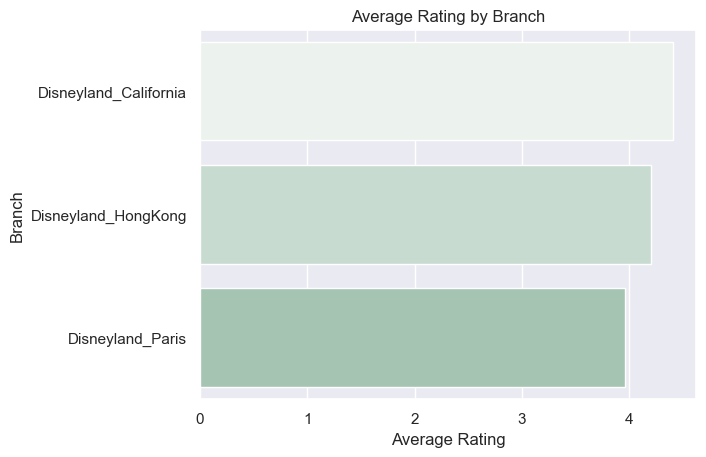

In [9]:
# Visualization
palette = sns.light_palette("seagreen")
sns.set(style="ticks")
sns.set_style("darkgrid")
sns.despine()
sns.barplot(avg_rating, x='Rating', y='Branch', palette=palette)
plt.title('Average Rating by Branch')
plt.xlabel('Average Rating')

plt.show()

### 3. Top 10 Reviewer Regions Visiting Disneyland

In [10]:
# Top 10 reviewer regions visiting disneyland 
# Group by locations to get unique count of reviews
total_reviewers = df.groupby('Reviewer_Location')['Review_ID'].nunique().reset_index().copy()
# Rename columns
total_reviewers.columns = ['Reviewer_Location', 'Review_Count']

In [11]:
# Sort out the order by the key 'Review_Count'
top_10_reviewers = total_reviewers.sort_values(by='Review_Count',ascending=False).head(10).reset_index(drop=True)
top_10_reviewers

,Reviewer_Location,Review_Count
0,United States,14542
1,United Kingdom,9751
2,Australia,4676
3,Canada,2234
4,India,1510
5,Philippines,1070
6,Singapore,1034
7,New Zealand,756
8,Malaysia,586
9,Hong Kong,554


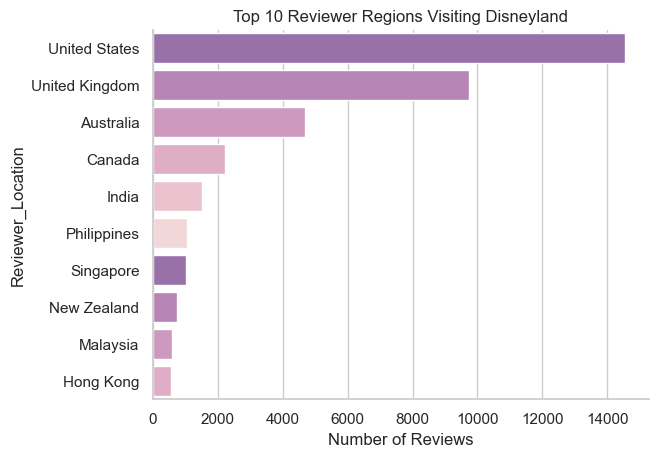

In [12]:
# Visualization
sns.set(style='whitegrid')
palette = sns.cubehelix_palette(dark=.25, light=.75, hue=1, gamma=.5, reverse=True)
sns.barplot(top_10_reviewers, x='Review_Count', y='Reviewer_Location', palette=palette)   
plt.title('Top 10 Reviewer Regions Visiting Disneyland')
plt.xlabel('Number of Reviews')
sns.despine()

plt.show()

### 4. Dinseyland Resorts(all) Yearly Average Rating

In [13]:
# Yearly avg rating on Disneyland 
# Group by Year and get the mean of rating 
avg_rate_per_year = df.groupby('Year')['Rating'].mean().reset_index().copy()
avg_rate_per_year

,Year,Rating
0,2010.0,4.167832
1,2011.0,4.214718
2,2012.0,4.288577
3,2013.0,4.223871
4,2014.0,4.241087
5,2015.0,4.259206
6,2016.0,4.234581
7,2017.0,4.235804
8,2018.0,4.136853
9,2019.0,4.111959


D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


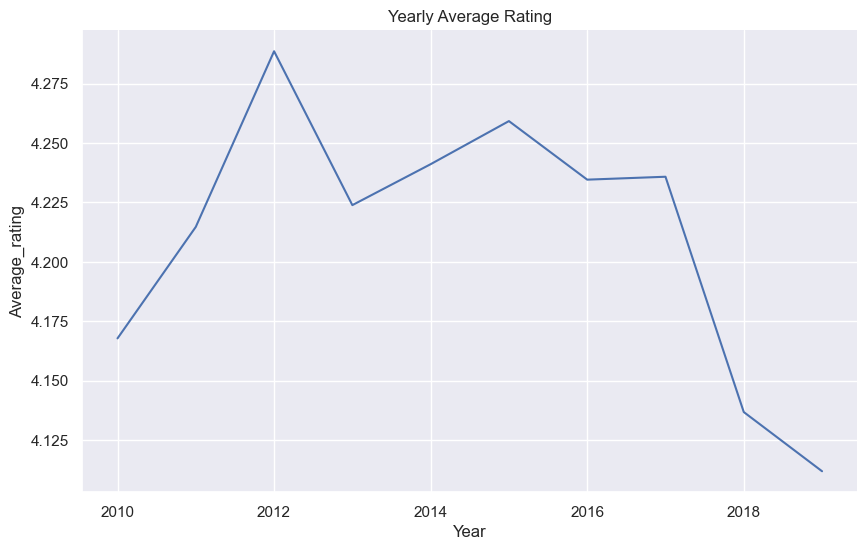

In [14]:
# Visualization
df = df.copy()
df.replace(['NaT'], np.nan, inplace=True)
sns.set(style='darkgrid')
palette = sns.light_palette("#79C")
plt.figure(figsize=(10, 6))
sns.lineplot(avg_rate_per_year, x='Year', y='Rating')
sns.despine()
plt.title('Yearly Average Rating')
plt.ylabel('Average_rating')

plt.show()

### 5. Correlation between Positive and Negative Reviews by Month and Branch

In [15]:
# Postive reviews (rating >= 4) by resort
df = df.copy()
# Filtered positive df 
pos_df = df[df['Rating'] >= 4]
# Group by month and branch get the num of positive reviews per month 
positive_reviews = pos_df.groupby(['Month', 'Branch'])['Rating'].size().reset_index()
# Rename the columns
positive_reviews.columns = ['Month', 'Branch', 'Positive_review_count']
positive_reviews

,Month,Branch,Positive_review_count
0,1.0,Disneyland_California,1006
1,1.0,Disneyland_HongKong,609
2,1.0,Disneyland_Paris,451
3,2.0,Disneyland_California,919
4,2.0,Disneyland_HongKong,392
5,2.0,Disneyland_Paris,620
6,3.0,Disneyland_California,1210
7,3.0,Disneyland_HongKong,630
8,3.0,Disneyland_Paris,658
9,4.0,Disneyland_California,1266


In [16]:
# Negative reviews (rating <= 3) by resort
df = df.copy()
# Filtered negative reviews df
neg_df = df[df['Rating'] <= 3]
# Group by month and branch to get the num of negative ratings per month
negative_reviews = neg_df.groupby(['Month', 'Branch'])['Rating'].size().reset_index()
# Rename the columns
negative_reviews.columns = ['Month', 'Branch', 'Negative_review_count']
negative_reviews

,Month,Branch,Negative_review_count
0,1.0,Disneyland_California,183
1,1.0,Disneyland_HongKong,135
2,1.0,Disneyland_Paris,132
3,2.0,Disneyland_California,188
4,2.0,Disneyland_HongKong,113
5,2.0,Disneyland_Paris,227
6,3.0,Disneyland_California,242
7,3.0,Disneyland_HongKong,131
8,3.0,Disneyland_Paris,263
9,4.0,Disneyland_California,216


In [17]:
# Merge two dfs 
review_counts = pd.merge(positive_reviews, negative_reviews, on=['Month', 'Branch'], how='outer').fillna(0)

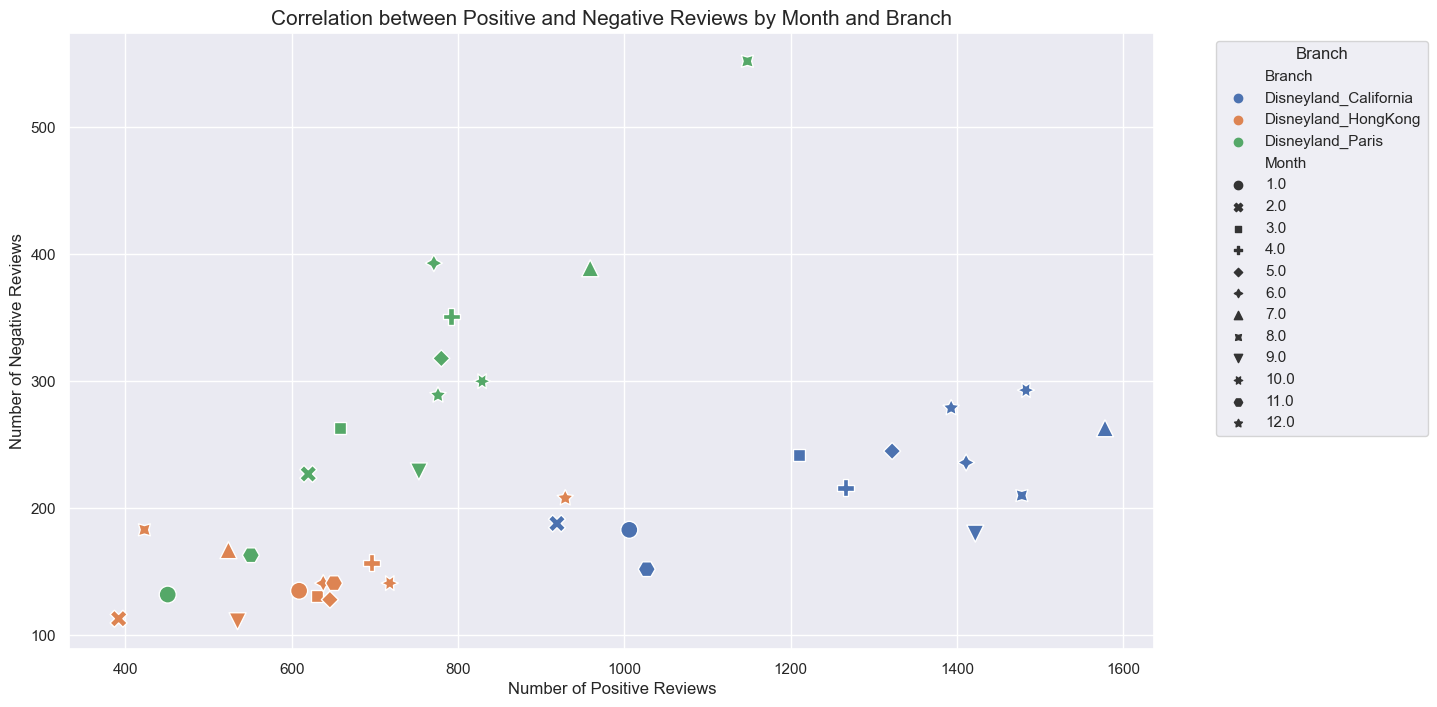

In [18]:
# Visualization
plt.figure(figsize=(14, 8))
sns.scatterplot(data=review_counts, x='Positive_review_count', y='Negative_review_count', hue='Branch', style='Month', palette='deep', s=150)
plt.title('Correlation between Positive and Negative Reviews by Month and Branch', fontsize=15)
plt.xlabel('Number of Positive Reviews')
plt.ylabel('Number of Negative Reviews')
plt.legend(title='Branch', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()

### The END!